# **Lesson 1**

In this lesson, use the dataset about car evaluation to create a decision tree classification model with Python. The data contains six features considered to classify the cars into different levels of acceptability. Solve the following tasks:

1.   Slip the data into training and test sets.
2.   Plot the generated tree.
3.   Calculate the model's accuracy.

## Dataset ##

Use the dataset available in this [link](https://raw.githubusercontent.com/higoramario/univesp-com410-aprendizado-de-maquinas/main/carros-avaliacao.csv).

## **Attributes:**

- **preco**: preço do carro (muito alto, alto, medio, baixo)
- **manutencao**: preço de manutenção (muito alto, alto, medio, baixo)
- **portas**: quantidade de portas (2, 3, 4, 5mais)
- **pessoas**: quantidade de portas (2, 4, 5mais)
- **bagageiro**: tamanho do bagageiro (grande, medio, pequeno)
- **seguranca**: segurança do carro (alta, media, baixa)
- **aceitabilidade (atributo-alvo)**: nível de aceitabilidade (inaceitavel, aceitavel, bom, muito bom)

You can fin the original dataset [here](https://archive.ics.uci.edu/dataset/19/car+evaluation).

In [30]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [31]:
# Leitura dos dados e criação do DataFrame
url = 'https://raw.githubusercontent.com/higoramario/univesp-com410-aprendizado-de-maquinas/main/carros-avaliacao.csv'
dados = pd.read_csv(url, sep=',')
dados.head(10)

,preco,manutencao,portas,pessoas,bagageiro,seguranca,aceitabilidade
0,muitoalto,muitoalto,2,2,pequeno,baixa,inaceitavel
1,muitoalto,muitoalto,2,2,pequeno,media,inaceitavel
2,muitoalto,muitoalto,2,2,pequeno,alta,inaceitavel
3,muitoalto,muitoalto,2,2,medio,baixa,inaceitavel
4,muitoalto,muitoalto,2,2,medio,media,inaceitavel
5,muitoalto,muitoalto,2,2,medio,alta,inaceitavel
6,muitoalto,muitoalto,2,2,grande,baixa,inaceitavel
7,muitoalto,muitoalto,2,2,grande,media,inaceitavel
8,muitoalto,muitoalto,2,2,grande,alta,inaceitavel
9,muitoalto,muitoalto,2,4,pequeno,baixa,inaceitavel


In [32]:
dados.dtypes

preco             object
manutencao        object
portas            object
pessoas           object
bagageiro         object
seguranca         object
aceitabilidade    object
dtype: object

In [33]:
# Transformação dos atributos categóricos para atributos discretos

#Copiando o DataFrame
dados_encoded = dados.copy()

#Inicialização do LabelEncoder
label_encoder = LabelEncoder()

#Iteração sobre cada coluna do dataframe
for col in dados_encoded.columns:
  if dados_encoded[col].dtype == 'object':
    dados_encoded[col+'_enc'] = label_encoder.fit_transform(dados_encoded[col])

#DataFrame transformado
dados_encoded.head(20)

,preco,manutencao,portas,pessoas,bagageiro,seguranca,aceitabilidade,preco_enc,manutencao_enc,portas_enc,pessoas_enc,bagageiro_enc,seguranca_enc,aceitabilidade_enc
0,muitoalto,muitoalto,2,2,pequeno,baixa,inaceitavel,3,3,0,0,2,1,2
1,muitoalto,muitoalto,2,2,pequeno,media,inaceitavel,3,3,0,0,2,2,2
2,muitoalto,muitoalto,2,2,pequeno,alta,inaceitavel,3,3,0,0,2,0,2
3,muitoalto,muitoalto,2,2,medio,baixa,inaceitavel,3,3,0,0,1,1,2
4,muitoalto,muitoalto,2,2,medio,media,inaceitavel,3,3,0,0,1,2,2
5,muitoalto,muitoalto,2,2,medio,alta,inaceitavel,3,3,0,0,1,0,2
6,muitoalto,muitoalto,2,2,grande,baixa,inaceitavel,3,3,0,0,0,1,2
7,muitoalto,muitoalto,2,2,grande,media,inaceitavel,3,3,0,0,0,2,2
8,muitoalto,muitoalto,2,2,grande,alta,inaceitavel,3,3,0,0,0,0,2
9,muitoalto,muitoalto,2,4,pequeno,baixa,inaceitavel,3,3,0,1,2,1,2


In [34]:
# Ajustando o DataFrame
dados_final = dados_encoded.copy()
dados_final = dados_final.drop(columns=['preco', 'manutencao', 'portas', 'pessoas', 'bagageiro', 'seguranca','aceitabilidade'])
dados_final.head(10)


,preco_enc,manutencao_enc,portas_enc,pessoas_enc,bagageiro_enc,seguranca_enc,aceitabilidade_enc
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
5,3,3,0,0,1,0,2
6,3,3,0,0,0,1,2
7,3,3,0,0,0,2,2
8,3,3,0,0,0,0,2
9,3,3,0,1,2,1,2


In [35]:
#Confirmando o número de categorias do atributo alvo
dados_final['aceitabilidade_enc'].unique()

array([2, 0, 3, 1])

## **Slip the data into training and test sets**

In [36]:
# Separando os atributos e o atributo alvo
dados_final_colunas = dados_final.columns[0:6].values.tolist()
dados_final_atributos = dados_final[dados_final_colunas]
dados_final_alvo = dados_final['aceitabilidade_enc']


In [37]:
# Separando os dados em treinamento e teste
atributos_treino, atributos_teste, alvo_treino, alvo_teste = train_test_split(dados_final_atributos, dados_final_alvo, test_size=0.9, train_size=0.1, random_state=10)

In [38]:
# Gerando o modelo
arvore = DecisionTreeClassifier()
arvore = arvore.fit(atributos_treino, alvo_treino)

In [39]:
alvo_predicao = arvore.predict(atributos_teste)

## **Calculate the model's accuracy**


In [40]:
acuracia = accuracy_score(alvo_teste, alvo_predicao)
print(f'Acurácia de classificação: {acuracia}')

Acurácia de classificação: 0.8740359897172236


## **Plot the generated tree**


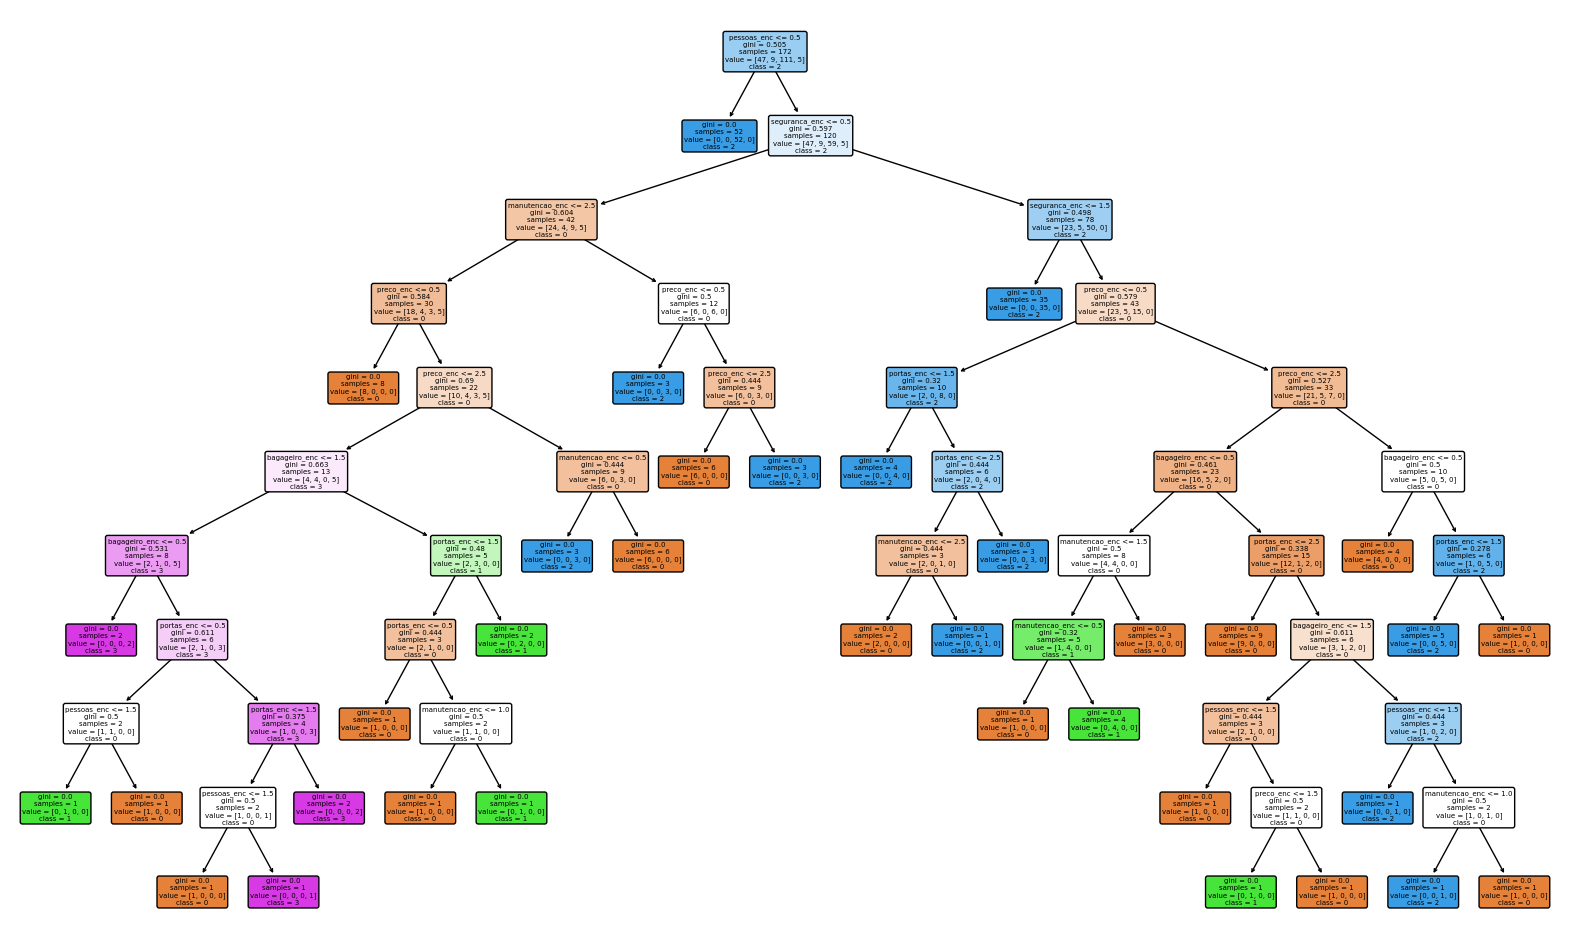

In [41]:
plt.figure(figsize=(20,12))
plot_tree(arvore, filled=True, rounded=True, class_names=['0', '1', '2', '3'], feature_names=dados_final_colunas)
plt.show()